# ニューラルネットワークの学習

## 損失関数

### 2乗誤差

In [8]:
function mean_squared_error(y, t)
    .5 * sum((y-t).^2)
end

mean_squared_error (generic function with 1 method)

In [9]:
y = [.1 .05 .6 .0 .05 .1 .0 .1 .0 .0]
t = [0 0 1 0 0 0 0 0 0 0]
mean_squared_error(y, t)

0.09750000000000003

In [10]:
y = [.1 .05 .1 .0 .05 .1 .0 .6 .0 .0]
mean_squared_error(y, t)

0.5974999999999999

### 交差エントロピー誤差

In [11]:
function cross_entropy_error(y, t)
    delta = 1e-7
    -sum(t.*log.(y+delta))
end

cross_entropy_error (generic function with 1 method)

In [12]:
y = [.1 .05 .6 .0 .05 .1 .0 .1 .0 .0]
t = [0 0 1 0 0 0 0 0 0 0]
cross_entropy_error(y, t)

0.510825457099338

In [13]:
y = [.1 .05 .1 .0 .05 .1 .0 .6 .0 .0]
cross_entropy_error(y, t)

2.302584092994546

### ミニバッチ学習

In [1]:
using MLDatasets
x_train, y_train = MNIST.traindata()
x_test, y_test = MNIST.testdata()

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [66]:
using StatsBase
train_size = size(x_train)[3]
batch_size = 10
batch_mask = sample(1:train_size, batch_size, replace=false)
x_batch = x_train[batch_mask]
y_batch = y_train[batch_mask]

10-element Array{Int64,1}:
 2
 0
 9
 2
 4
 5
 3
 4
 1
 0

In [102]:
function cross_entropy_error(y, t) # one-hot vector
    if ndims(y) == 0
        t = reshape(t, 1, length(t))
        y = reshpae(y, 1, length(y))
    end
    batch_size = size(y)[end]
    -sum(t.*log.(y))/batch_size
end

function cross_entropy_error(y, t) # not one-hot vector
    if ndims(y) == 0
        t = reshape(t, 1, length(t))
        y = reshpae(y, 1, length(y))
    end
    batch_size = size(y)[end]
    -sum(log.(y[1:batch_size, t])) / batch_size
end

cross_entropy_error (generic function with 1 method)

## 数値微分

In [73]:
function numerical_diff(f, x) # bad
    h = 10e-50
    (f(x_h) - f(x)) / h
end

function numerical_diff(f, x) # better
    h = 1e-4
    (f(x+h) - f(x-h)) / (2*h)
end

numerical_diff (generic function with 1 method)

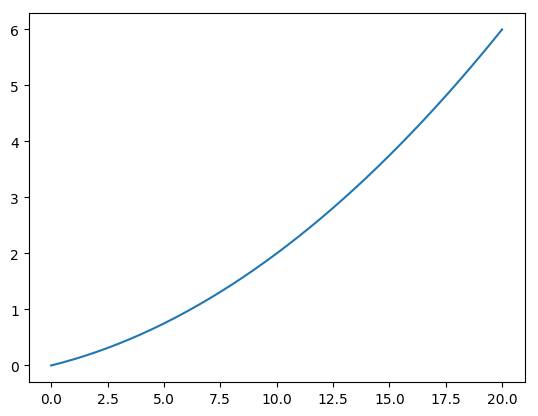

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x149d3b518>

In [75]:
using PyPlot

function function_1(x)
    0.01.*x.^2 + 0.1.*x
end

x = 0:0.1:20
y = function_1(x)
plot(x, y)

In [76]:
println(numerical_diff(function_1, 5))
println(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [77]:
function function_2(x)
    sum(x.^2)
end

function_2 (generic function with 1 method)

In [78]:
function function_tmp1(x0)
    x0*x0 + 4^2
end
numerical_diff(function_tmp1, 3.0)

6.00000000000378

In [79]:
function function_tmp2(x1)
    3^2 + x1*x1
end
numerical_diff(function_tmp2, 4.0)

7.999999999999119

## 勾配

In [10]:
function numerical_gradient(f, x)
    h = 1e-4
    grad = zeros(size(x))
    for idx in 1:length(x)
        tmp_val = x[idx]
        
        x[idx] = tmp_val + h
        fxh1 = f(x)        
        x[idx] = tmp_val - h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    end
    grad
end

numerical_gradient (generic function with 1 method)

In [85]:
println(numerical_gradient(function_2, [3. 4.]))
println(numerical_gradient(function_2, [0. 2.]))
println(numerical_gradient(function_2, [3. 0.]))

[6.0 8.0]
[0.0 4.0]
[6.0 0.0]


In [228]:
function gradient_descent(f, init_x; lr=0.01, step_num=100)
    x = init_x
    for i in 1:step_num
        grad = numerical_gradient(f, x)
        x -= lr * grad        
    end
    x
end

gradient_descent (generic function with 1 method)

In [94]:
function function_2(x)
    sum(x.^2)
end

init_x = [-3. 4.]
gradient_descent(function_2, init_x, lr=0.1, step_num=100)

1×2 Array{Float64,2}:
 -6.11111e-10  8.14814e-10

In [95]:
gradient_descent(function_2, init_x, lr=10, step_num=100)

1×2 Array{Float64,2}:
 -2.58984e13  -1.29525e12

In [96]:
gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

1×2 Array{Float64,2}:
 -3.0  4.0

### ニューラルネットワークに対する勾配

In [3]:
function sigmoid(x)
    1 ./ (1 .+ exp.(-x))
end

function softmax(a)
    exp_a = exp.(a)
    sum_exp_a = sum(exp_a)
    y = exp_a / sum_exp_a
    y
end

function cross_entropy_error(y, t) # one-hot vector
    if ndims(y) == 0
        t = reshape(t, 1, length(t))
        y = reshpae(y, 1, length(y))
    end
    batch_size = size(y)[end]
    -sum(t.*log.(y))/batch_size
end

cross_entropy_error (generic function with 1 method)

In [199]:
type SimpleNet
    W::Array{Float64}
    predict::Function
    loss::Function

    function SimpleNet()
        
        W = randn(2, 3)
        
        predict = function (x)
            W'*x
        end

        loss = function (x, t)
            z = predict(x)
            y = softmax(z)
            loss = cross_entropy_error(y, t)
            loss
        end
        return new(W, predict, loss)
    end
end

In [200]:
net = SimpleNet()
println(net.W)
x = [0.6; 0.9]
p = net.predict(x)
println(p)
println(indmax(p))
t = [0 0 1]
net.loss(x, t)

[1.067 0.412057 0.0336534; 1.62584 1.47549 -0.984667]
[2.10345, 1.57518, -0.866008]
1


1.6611888891380804

In [203]:
function f(W)
    net.loss(x, t)
end
#f =  W -> net.loss(x, t)　でもよい

dW = numerical_gradient(f, net.W)
dW

2×3 Array{Float64,2}:
 0.165642  0.0155897  -0.181231
 0.248462  0.0233846  -0.271847

In [204]:
dW

2×3 Array{Float64,2}:
 0.165642  0.0155897  -0.181231
 0.248462  0.0233846  -0.271847

## 学習アルゴリズムの実装

### 2層ニューラルネットワーク

In [11]:
type TwoLayerNet
    params::Dict{String, Array{Float64}}
    predict::Function
    loss::Function
    accuracy::Function
    numerical_gradient::Function    
    
    function TwoLayerNet(input_size, hidden_size, output_size; weight_init_std=0.01)
        params = Dict()
        params["W1"] = weight_init_std * randn(input_size, hidden_size)
        params["b1"] = zeros(hidden_size)'
        params["W2"] = weight_init_std * randn(hidden_size, output_size)
        params["b2"] = zeros(output_size)'
        
        predict = function(x)
            W1, W2 = params["W1"], params["W2"]
            b1, b2 = params["b1"], params["b2"]
            a1 =x*W1 .+ b1
            z1 = sigmoid(a1)
            a2 = z1*W2 .+ b2
            y = softmax(a2)
            y
        end
        
        loss = function(x, t)
            y = predict(x)
            cross_entropy_error(y, t)
        end
        
        accuracy = function(x, t)
            y = predict(x)
            tmp = findmax(y, 1)[2]
            y = [tmp[j] - (i-1)*output_size for i in 1:length(tmp)]
            t = indmax(t)
            accuracy = sum(t[i:i+batch_size-1] .== p-1) / float(size(x)[1])
        end
        
        numerical_gradient = function(x, t)
            loss_W = W -> loss(x, t)
            grads = Dict()
            grads["W1"] = numerical_gradient(loss_W, params["W1"])
            grads["b1"] = numerical_gradient(loss_W, params["b1"])
            grads["W2"] = numerical_gradient(loss_W, params["W2"])
            grads["b2"] = numerical_gradient(loss_W, params["b2"])
            grads
        end
        
        new(params, predict, loss, accuracy, numerical_gradient)
    end    
end

In [12]:
net = TwoLayerNet(784, 100, 10)
println(size(net.params["W1"]))
println(size(net.params["b1"]))
println(size(net.params["W2"]))
println(size(net.params["b2"]))

(784, 100)
(1, 100)
(100, 10)
(1, 10)


In [13]:
x = rand(100, 784)
y = net.predict(x)

x = rand(100, 784)
t = rand(100, 10)

grads = net.numerical_gradient(x, t) # stackoverflowになる
println(size(grads["W1"]))
println(size(grads["b1"]))
println(size(grads["W2"]))
println(size(grads["b2"]))

LoadError: [91mStackOverflowError:[39m

### ミニバッチ学習の実装

In [6]:
x_train, t_train = MNIST.traindata()
x_test, t_test = MNIST.testdata()

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [7, 2, 1, 0, 4, 1, 4, 9, 5, 9  …  7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [14]:
train_loss_list = []

iters_num = 1000
train_size = size(x_train)[1]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(784, 50, 10)
for i in 1:iters_num
    batch_mask = rand(1:train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    grad = network.numerical_gradient(x_batch, t_batch)
    
    for key in ["W1", "b1", "W2", "b2"]
        network.params[key] -= learning_rate * grad[key]
    end
    
    loss = network.loss(x_batch, t_batch)
    append!(train_loss_list, loss)
end

LoadError: [91mStackOverflowError:[39m

### テストデータで評価
(省略)

juliaでは数値微分無理そう（？）